In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
df = pd.read_excel("Online_Retail.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
import seaborn as sns
sns.set_palette("husl")
sns.set(rc={'image.cmap': 'coolwarm'})
%matplotlib inline

In [4]:
import datetime as dt
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate']).dt.date
df = df[pd.notnull(df['CustomerID'])]
df = df[(df['Quantity']>0)]
df['Sales'] = df['Quantity'] * df['UnitPrice']
cols_of_interest = ['CustomerID', 'InvoiceDate', 'Sales']
df = df[cols_of_interest]
print(df.head())
print(df.head())
print(df['CustomerID'].nunique())

   CustomerID InvoiceDate  Sales
0     17850.0  2010-12-01  15.30
1     17850.0  2010-12-01  20.34
2     17850.0  2010-12-01  22.00
3     17850.0  2010-12-01  20.34
4     17850.0  2010-12-01  20.34
   CustomerID InvoiceDate  Sales
0     17850.0  2010-12-01  15.30
1     17850.0  2010-12-01  20.34
2     17850.0  2010-12-01  22.00
3     17850.0  2010-12-01  20.34
4     17850.0  2010-12-01  20.34
4339


In [5]:
from lifetimes.plotting import *
from lifetimes.utils import *

data = summary_data_from_transaction_data(df, 'CustomerID', 'InvoiceDate', monetary_value_col='Sales', observation_period_end='2011-12-9')
data.head()

,frequency,recency,T,monetary_value
CustomerID,,,,
12346.0,0.0,0.0,325.0,0.000000
12347.0,6.0,365.0,367.0,599.701667
12348.0,3.0,283.0,358.0,301.480000
12349.0,0.0,0.0,18.0,0.000000
12350.0,0.0,0.0,310.0,0.000000


count    4339.000000
mean        2.864024
std         5.952745
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max       131.000000
Name: frequency, dtype: float64
0.3569946992394561


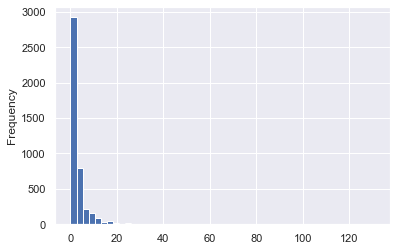

In [6]:
data['frequency'].plot(kind='hist', bins=50)
print(data['frequency'].describe())
print(sum(data['frequency'] == 0)/float(len(data)))

In [7]:
from lifetimes import BetaGeoFitter
bgf = BetaGeoFitter(penalizer_coef=0.0)
bgf.fit(data['frequency'], data['recency'], data['T'])
print(bgf)

<lifetimes.BetaGeoFitter: fitted with 4339 subjects, a: 0.00, alpha: 68.89, b: 6.75, r: 0.83>


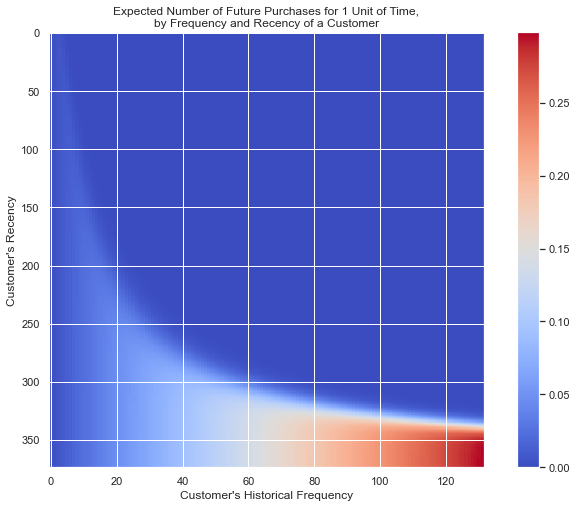

In [8]:
from lifetimes.plotting import plot_frequency_recency_matrix
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,8))
plot_frequency_recency_matrix(bgf)

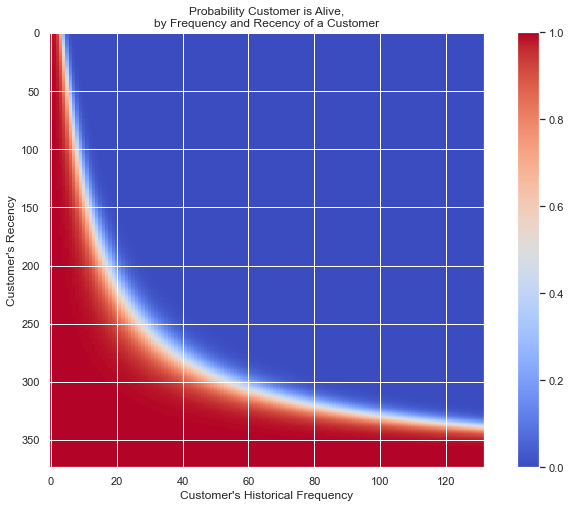

In [9]:
from lifetimes.plotting import plot_probability_alive_matrix
fig = plt.figure(figsize=(12,8))
plot_probability_alive_matrix(bgf)

In [10]:
t = 30
data['predicted_purchases'] = bgf.conditional_expected_number_of_purchases_up_to_time(t, data['frequency'], data['recency'], data['T'])
data.sort_values(by='predicted_purchases').tail(5)

,frequency,recency,T,monetary_value,predicted_purchases
CustomerID,,,,,
14606.0,88.0,372.0,373.0,135.890114,6.029510
15311.0,89.0,373.0,373.0,677.729438,6.097442
17841.0,111.0,372.0,373.0,364.452162,7.590787
12748.0,113.0,373.0,373.0,298.360885,7.726616
14911.0,131.0,372.0,373.0,1093.661679,8.948418


In [23]:
data['total_value'] = data['monetary_value'] * data['predicted_purchases']
data['CustomerID'] = data.index
plot_data = data.sort_values(by='predicted_purchases').tail(10)
plot_data = plot_data.sort_values(by='total_value', ascending=False)
data.sort_values(by=['predicted_purchases']).tail(10)

,frequency,recency,T,monetary_value,predicted_purchases,total_value,CustomerID
CustomerID,,,,,,,
16422.0,47.0,352.0,369.0,702.472340,3.274837,2300.482358,16422.0
13798.0,52.0,371.0,372.0,706.650962,3.593907,2539.637493,13798.0
14527.0,53.0,367.0,369.0,155.016415,3.686995,571.544762,14527.0
13089.0,65.0,367.0,369.0,893.714308,4.509004,4029.761187,13089.0
12971.0,70.0,369.0,372.0,159.211286,4.818447,767.151123,12971.0
14606.0,88.0,372.0,373.0,135.890114,6.029510,819.350804,14606.0
15311.0,89.0,373.0,373.0,677.729438,6.097442,4132.415684,15311.0
17841.0,111.0,372.0,373.0,364.452162,7.590787,2766.478586,17841.0
12748.0,113.0,373.0,373.0,298.360885,7.726616,2305.319888,12748.0


In [26]:
plot_data['predicted_amt'] = plot_data['total_value'] + plot_data['monetary_value']
plot_data = plot_data.sort_values(['predicted_amt'], ascending=False)
plot_data.head(10)

,frequency,recency,T,monetary_value,predicted_purchases,total_value,CustomerID,predicted_amt
CustomerID,,,,,,,,
14911.0,131.0,372.0,373.0,1093.661679,8.948418,9786.542134,14911.0,10880.203813
13089.0,65.0,367.0,369.0,893.714308,4.509004,4029.761187,13089.0,4923.475494
15311.0,89.0,373.0,373.0,677.729438,6.097442,4132.415684,15311.0,4810.145122
13798.0,52.0,371.0,372.0,706.650962,3.593907,2539.637493,13798.0,3246.288455
17841.0,111.0,372.0,373.0,364.452162,7.590787,2766.478586,17841.0,3130.930748
16422.0,47.0,352.0,369.0,702.472340,3.274837,2300.482358,16422.0,3002.954699
12748.0,113.0,373.0,373.0,298.360885,7.726616,2305.319888,12748.0,2603.680772
14606.0,88.0,372.0,373.0,135.890114,6.029510,819.350804,14606.0,955.240917
12971.0,70.0,369.0,372.0,159.211286,4.818447,767.151123,12971.0,926.362409


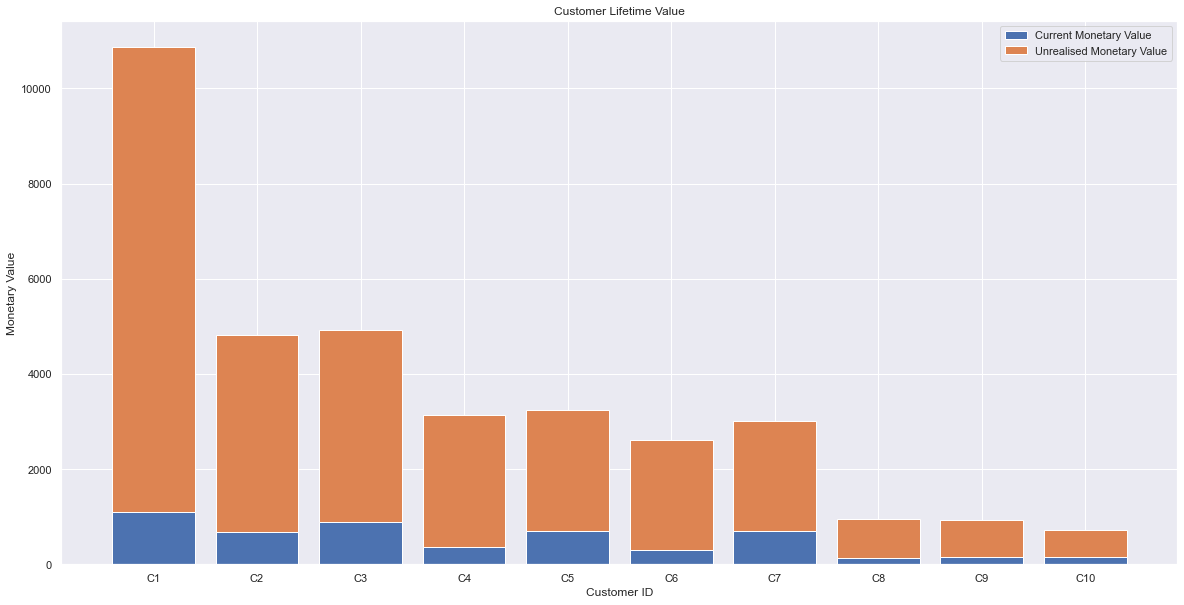

In [25]:
import numpy as np
import matplotlib.pyplot as plt
width = 0.15
labels = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10']
fig, ax = plt.subplots(figsize=(20,10))
monetary_value = ax.bar(labels,plot_data['monetary_value'], label='Current Monetary Value')
total_value = ax.bar(labels,plot_data['total_value'], bottom= plot_data['monetary_value'], label='Unrealised Monetary Value')
ax.legend()
ax.set_ylabel('Monetary Value')
ax.set_xlabel('Customer ID')
ax.set_title('Customer Lifetime Value')
plt.show()

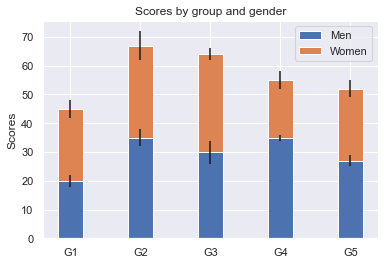

In [13]:
import numpy as np
import matplotlib.pyplot as plt


labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 35, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]
men_std = [2, 3, 4, 1, 2]
women_std = [3, 5, 2, 3, 3]
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, men_means, width, yerr=men_std, label='Men')
ax.bar(labels, women_means, width, yerr=women_std, bottom=men_means,
       label='Women')

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.legend()

plt.show()

In [14]:
from lifetimes.utils import calibration_and_holdout_data
summary_cal_holdout = calibration_and_holdout_data(df, 'CustomerID', 'InvoiceDate',
                                        calibration_period_end='2011-06-08',
                                        observation_period_end='2011-12-9' )   
print(summary_cal_holdout.head())

            frequency_cal  recency_cal  T_cal  frequency_holdout  \
CustomerID                                                         
12346.0               0.0          0.0  141.0                0.0   
12347.0               2.0        121.0  183.0                4.0   
12348.0               2.0        110.0  174.0                1.0   
12350.0               0.0          0.0  126.0                0.0   
12352.0               3.0         34.0  112.0                3.0   

            duration_holdout  
CustomerID                    
12346.0                184.0  
12347.0                184.0  
12348.0                184.0  
12350.0                184.0  
12352.0                184.0  


In [15]:
from lifetimes.plotting import plot_calibration_purchases_vs_holdout_purchases
bgf.fit(summary_cal_holdout['frequency_cal'], summary_cal_holdout['recency_cal'], summary_cal_holdout['T_cal'])
plot_calibration_purchases_vs_holdout_purchases(bgf, summary_cal_holdout)

      fun: -0.38259364749394853
 hess_inv: array([[ 3.95106824e+00,  3.42790444e+00, -2.26020351e+04,
         1.55110944e+04],
       [ 3.42790444e+00,  4.52908258e+00, -2.79212784e+04,
         1.91615253e+04],
       [-2.26020351e+04, -2.79212784e+04,  6.94628621e+09,
        -4.76702430e+09],
       [ 1.55110944e+04,  1.91615253e+04, -4.76702430e+09,
         3.27146334e+09]])
      jac: array([2.81204820e-08, 1.38874272e-07, 2.14627471e-11, 0.00000000e+00])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 90
      nit: 39
     njev: 80
   status: 2
  success: False
        x: array([ -0.29607027,  -1.11817365, -13.91962883,   9.71228131])


ConvergenceError: 
The model did not converge. Try adding a larger penalizer to see if that helps convergence.


In [ ]:
t = 10
individual = data.loc[12347]
bgf.predict(t, individual['frequency'], individual['recency'], individual['T'])

In [ ]:
from lifetimes.plotting import plot_history_alive
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,8))
id = 14606
days_since_birth = 365
sp_trans = df.loc[df['CustomerID'] == id]
plot_history_alive(bgf, days_since_birth, sp_trans, 'InvoiceDate')

In [ ]:
returning_customers_summary = data[data['frequency']>0]
print(returning_customers_summary.head())
print(len(returning_customers_summary))

In [ ]:
from lifetimes import GammaGammaFitter
ggf = GammaGammaFitter(penalizer_coef = 0)
ggf.fit(returning_customers_summary['frequency'],
        returning_customers_summary['monetary_value'])
print(ggf)

In [ ]:
print(ggf.conditional_expected_average_profit(
        data['frequency'],
        data['monetary_value']
    ).head(10))

In [ ]:
returning_customers_summary